# Modeling

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('labels_and_feats_df.csv')
df.head()

,Label,RMS_signal,CF,THD,PHI,TIHD
0,1,0.707108,1.414212,0.000004,1.0,7.441246e-14
1,1,0.707108,1.414212,0.000004,1.0,7.441246e-14
2,1,0.707108,1.414212,0.000004,1.0,7.441246e-14
3,1,0.707108,1.414212,0.000004,1.0,7.441246e-14
4,1,0.707108,1.414212,0.000004,1.0,7.441246e-14


In [6]:
#split into X and y variables
X = df.drop(columns=['Label'])
y = df['Label']

X.shape, y.shape

((7500, 5), (7500,))

In [7]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6000, 5), (1500, 5), (6000,), (1500,))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       100
           2       0.97      0.97      0.97       100
           3       0.97      1.00      0.99       100
           4       1.00      1.00      1.00       100
           5       1.00      1.00      1.00       100
           6       1.00      1.00      1.00       100
           7       1.00      1.00      1.00       100
           8       1.00      1.00      1.00       100
           9       1.00      1.00      1.00       100
          10       0.91      0.96      0.93       100
          11       0.88      0.92      0.90       100
          12       0.94      0.94      0.94       100
          13       1.00      0.97      0.98       100
          14       0.94      0.88      0.91       100
          15       0.92      0.88      0.90       100

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97   

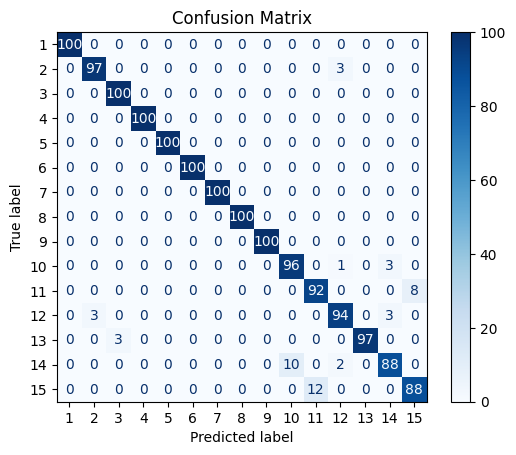

In [9]:


#train Random forest
rf_model = RandomForestClassifier(random_state=52)
rf_model.fit(X_train, y_train)

#preds
y_pred = rf_model.predict(X_test)

#evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#classification report
print(class_report)

#confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.savefig('Confusion.png')
plt.title("Confusion Matrix")
plt.show()

In [10]:
#to-do: try more models - 